In [84]:
from keras.models import load_model
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import json
import nltk
import random
import numpy as np
from random import seed

In [85]:
model = load_model('../chatbot/chatbot_model.h5')

In [86]:
lemmatizer = WordNetLemmatizer()
op = open('intents.json')
intents = json.load(op)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [87]:
words = []
classes = []
documents = []
ignoreLetters = ['?', '!', '.', '.']

In [88]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        wordList = nltk.word_tokenize(pattern)
        words.extend(wordList)
        documents.append((wordList, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [89]:
words = [stemmer.stem(word) for word in words if word not in ignoreLetters]
wrodds = sorted(set(words))
classes = sorted(set(classes))

In [90]:
training = []
outputEmpty = [0] * len(classes)

In [91]:
for document in documents:
    # print(document)
    bag = []
    wordPatterns = document[0]
    wordPatterns = [lemmatizer.lemmatize(word.lower()) for word in wordPatterns]
    for word in words:
        bag.append(1) if word in wordPatterns else bag.append(0)
    
    outputRow = list(outputEmpty)
    outputRow[classes.index(document[1])] = 1
    training.append([bag, outputRow])

In [92]:
random.shuffle(training)
training = np.array(training, dtype='object')

x = list(training[:, 0])
y = list(training[:, 1])

In [93]:
x_test1 = []
for i in range(133):
    x_test1.append(np.random.binomial(1,.9,size = 246))

x_test =[]
for i in range(len(x_test1)):
    x_test.append(x_test1[i].tolist())

In [94]:
print(len(x))
print(len(x[4]))
print(type(x[0]))
print(type(x_test[0]))

133
246
<class 'list'>
<class 'list'>


In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=100, random_state = 42)

In [96]:
from sklearn.model_selection import cross_val_score
# acc = cross_val_score(estimator= model, x = x_train1, y=y_train1, cv=10)

In [97]:
ypred = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [98]:
print(ypred)

[[1.2265217e-06 6.8848891e-07 3.2595427e-08 ... 2.4483571e-09
  2.0149428e-06 6.6976247e-10]
 [5.4530501e-06 1.3014172e-08 9.9976319e-01 ... 9.6976294e-10
  1.5677287e-07 8.5092736e-08]
 [3.7666735e-20 1.6890611e-13 1.2042790e-18 ... 2.6257067e-17
  1.2154333e-19 1.1990588e-24]
 ...
 [2.9368543e-08 5.4601423e-07 1.6218511e-08 ... 1.0891505e-11
  1.7991365e-08 1.7229044e-09]
 [7.1814850e-07 4.1329247e-07 1.0423399e-06 ... 1.6466016e-07
  4.5759329e-08 4.9590909e-08]
 [5.5555884e-25 1.9431871e-30 8.8776493e-22 ... 5.0656878e-30
  6.0950196e-23 1.7633778e-28]]


In [99]:
y_temp = np.argmax(ypred, axis=0)
len(y_temp)

58

In [100]:
ypred_arg= np.argmax(ypred, axis= 1)
ytest_arg= np.argmax(y, axis= 1)

In [101]:
from sklearn.metrics import confusion_matrix
ass1 = confusion_matrix(ytest_arg, ypred_arg)
# ass1 = confusion_matrix(ytest_arg, ypred_arg)

ValueError: Found input variables with inconsistent numbers of samples: [133, 100]

In [ ]:
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
from sklearn.metrics import ConfusionMatrixDisplay
import numpy
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix= ass1, display_labels=[False, True])
cm_display.plot
plt.show


<function matplotlib.pyplot.show(*args, **kwargs)>

In [ ]:
len(ass1)

58

In [ ]:
import pandas as pd
cm_df = pd.DataFrame(ass1)

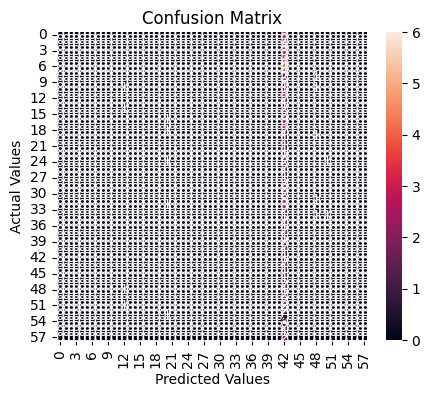

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import precision_score
precision_score(ytest_arg, ypred_arg, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00854701, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest_arg, ypred_arg)
# b= seed(a = accuracy_score(ytest_arg, ypred_arg))
# print(b)

0.007518796992481203

In [ ]:
from sklearn.metrics import recall_score
recall_score(ytest_arg, ypred_arg, average=None)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(ytest_arg, ypred_arg))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4
          17       0.00    

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
from sklearn import metrics
ass1_display = metrics.ConfusionMatrixDisplay(confusion_matrix=ass1, display_labels=[False, True])



====================trial n error===================================================================================

In [ ]:
#predict berdasarkan data pada x_test
x_pred = model.predict(x_test)

5/5 [==============================] - 0s 995us/step


In [ ]:
x_pred

array([[3.3438347e-08, 2.9373765e-10, 2.0779431e-14, ..., 8.9801577e-13,
        3.0573159e-07, 5.3327756e-07],
       [3.8203694e-09, 3.9632349e-11, 1.3386316e-18, ..., 5.5636779e-15,
        9.6988435e-09, 3.3337763e-08],
       [2.0002894e-04, 6.2906220e-06, 3.7234056e-09, ..., 2.1084441e-07,
        1.5206374e-03, 3.5593033e-04],
       ...,
       [5.2222051e-04, 1.6527622e-06, 7.8406159e-10, ..., 1.9170859e-08,
        6.5998308e-04, 2.9566430e-05],
       [9.1455640e-06, 2.3271186e-08, 1.7824869e-13, ..., 2.2044326e-11,
        7.3755399e-07, 4.4741481e-07],
       [9.7786678e-06, 9.2991989e-08, 5.5725332e-14, ..., 7.7855838e-12,
        1.2498555e-07, 2.1795843e-06]], dtype=float32)

In [ ]:
#numpy argmax dengan axis1 pada data hasil prediction
x_predargmax = np.argmax(x_pred, axis= 1)
x_predargmax

array([42, 42, 42, 42, 50, 42, 20, 42, 42, 42, 42, 48, 42, 42, 42, 48, 20,
       42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 12, 42, 42, 42, 20,
       42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 20, 42, 42, 42,
       42, 42, 42, 42, 42, 48, 42, 42, 42, 42, 42, 42, 42, 12, 42, 42, 42,
       12, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 20, 42, 48, 42, 42,
       42, 42, 42, 42, 48, 42, 42, 42, 42, 42, 42, 50, 42, 42, 42, 42, 42,
       42, 42, 42, 12, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,
       42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42],
      dtype=int64)

In [ ]:
#numpy argmax dengan axis1 pada data aslinya
x_truearg = np.argmax(x_test, axis= 1)
x_truearg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0], dtype=int64)

In [ ]:
y

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [ ]:
#cf disusun berdasarkan data asli dan dan data prediction
#kedua parameter jumlah labelnya harus sama
from sklearn.metrics import confusion_matrix
confusion_matrix(x_truearg, x_predargmax)

array([[  0,   0,   0,   4,   5, 107,   4,   2],
       [  0,   0,   0,   0,   0,  10,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [ ]:
ass = confusion_matrix(x_truearg, x_predargmax)

In [ ]:
import pandas as pd

In [ ]:
cm_df = pd.DataFrame(ass)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

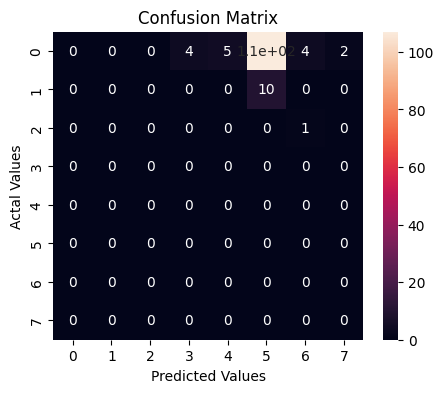

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(x_truearg, x_predargmax)

0.0

In [ ]:
from sklearn.metrics import precision_score
precision_score(x_truearg, x_predargmax, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0., 0., 0., 0., 0., 0., 0., 0.])